# Poisson Distribution

In [1]:
"""
    TITLE   : Poisson distribution
    PROJECT : streamtrack
""";

__author__ = 'Nathaniel Starkman'
__version__ = 'Jul 19, 2020'

<br><br>

- - - 


## Prepare

### Imports

In [2]:
from utilipy import ipython

ipython.set_autoreload(2)
ipython.run_imports(base=True, astropy=True, matplotlib=True)


# BUILT-IN

import sys; sys.path.insert(0, "../")  # noqa


# THIRD PARTY

import seaborn

# PROJECT-SPECIFIC


set autoreload to 1
set autoreload to 2


In [3]:
rng = np.random.default_rng()

Running the model

In [4]:
from scipy.stats import rv_continuous, invgamma
from scipy.special import gamma, gammainc, gammaincc, gammainccinv, loggamma

# vec_invgamma = np.vectorize(invgamma)

class poisson_cont(rv_continuous):
    def _pdf(self, x, mu):
        return np.exp(-mu) * mu**x / gamma(x+1)
    
    def _logpdf(self, x, mu):
        return x * np.log(mu) - mu + loggamma(x)

    def _cdf(self, x, mu):
        return gammaincc(x+1, mu)
    
#     def _logcdf(self, x, mu):
#         return np.log(gammaincc(x+1, mu) * gamma(mu)) - np.log(gamma(mu))

#     def _sf(self, x, mu):
#         return gammainc(x+1, mu)
    
#     def _logsf(self, x, mu):
#         return np.log(gammainc(x+1, mu) * gamma(mu)) - np.log(gamma(mu))
    
    
poisson = poisson_cont(
    name="poisson", a=0.01, b=13,
)

In [5]:
x = np.linspace(0, 12.5, num=1000)
mu = np.linspace(0.1, 5, num=5)

X, Mu = np.meshgrid(x, mu)
Y = poisson.cdf(X, mu=Mu)

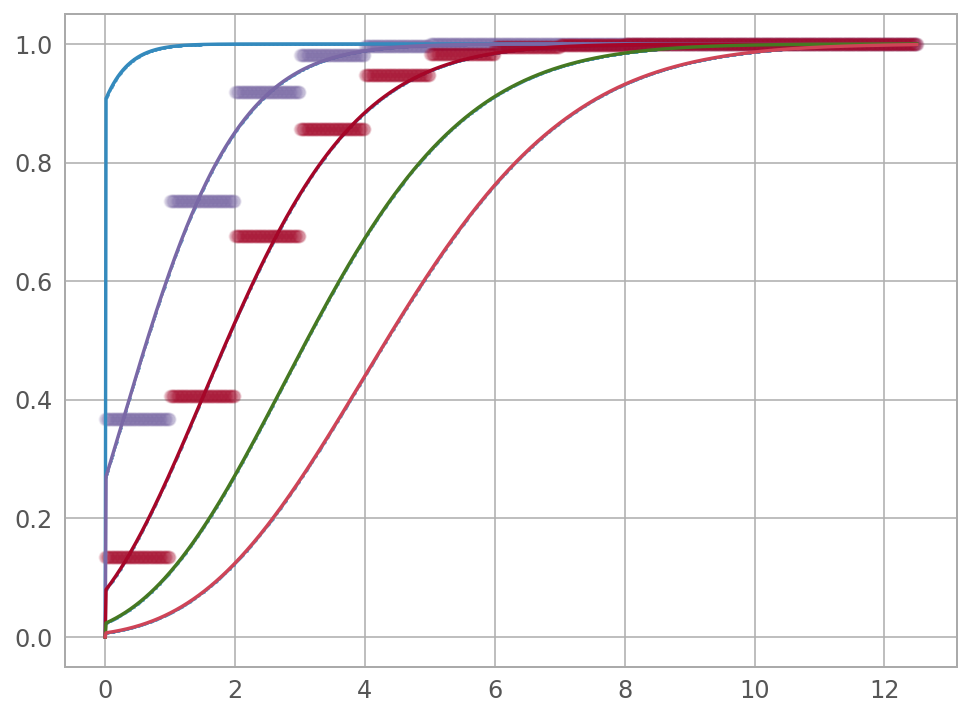

In [6]:
plt.scatter(X, Y, s=0.1)
plt.plot(X.T, Y.T)

plt.scatter(x, scipy.stats.poisson.cdf(x, 1), alpha=0.1)
plt.scatter(x, scipy.stats.poisson.cdf(x, 2), alpha=0.1)
plt.show();

In [15]:
%%time

draws = poisson.rvs(mu=0.1, size=100, random_state=0)

CPU times: user 300 ms, sys: 9.07 ms, total: 310 ms
Wall time: 306 ms


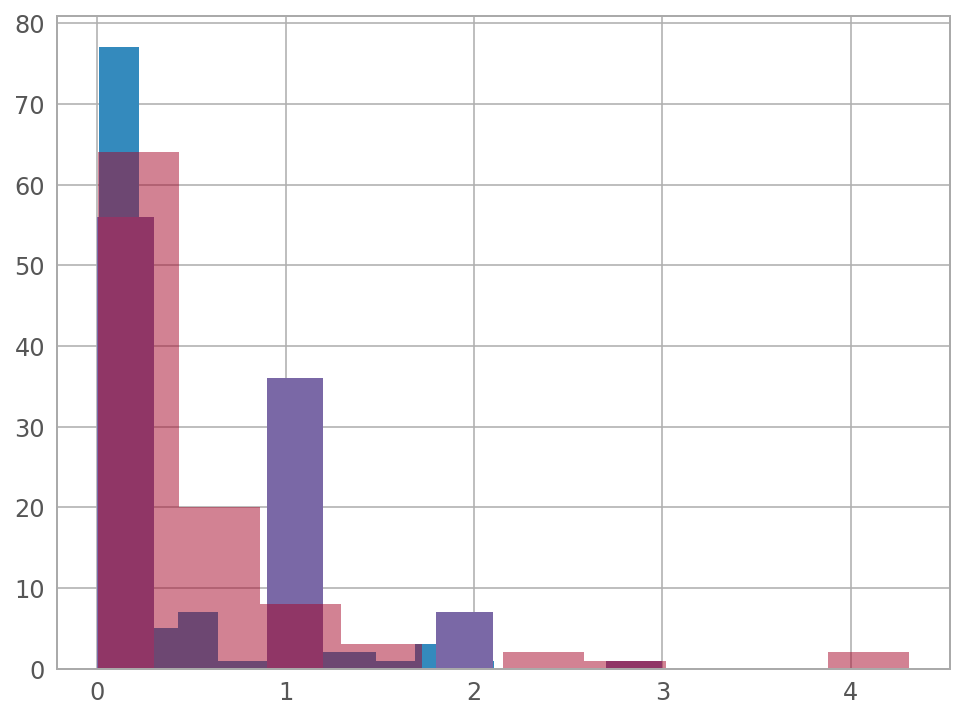

In [22]:
draws = poisson.rvs(mu=0.5, size=100, random_state=0)
plt.hist(draws, bins=10);

draws2 = scipy.stats.poisson.rvs(0.5, size=100, random_state=0)
plt.hist(draws2, bins=10);

draws3 = scipy.stats.gamma.rvs(0.5, size=100, random_state=0)
plt.hist(draws3, alpha=0.5, bins=10);

<br><br>

- - - 

<span style='font-size:40px;font-weight:650'>
    END
</span>